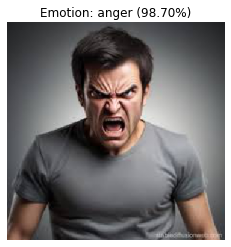

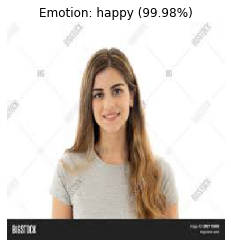

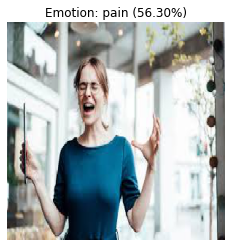

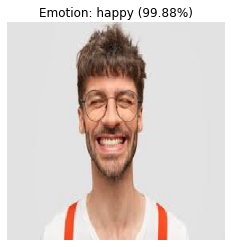

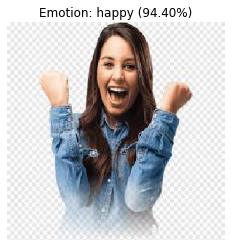

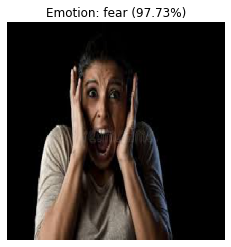

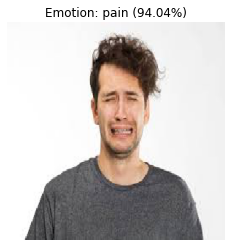

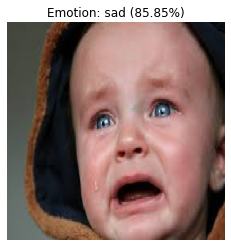

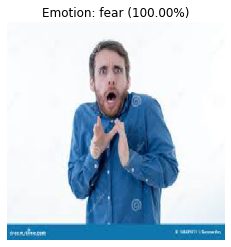

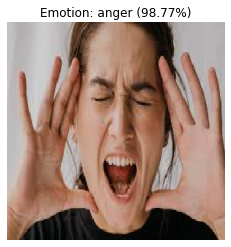

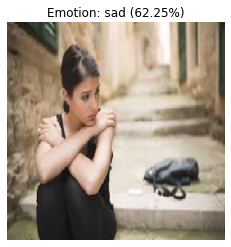

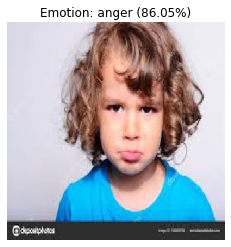

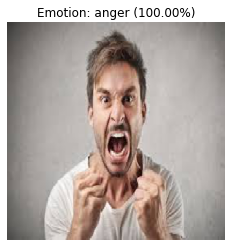

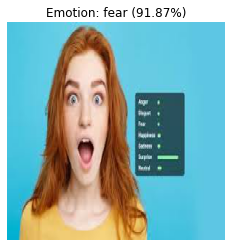

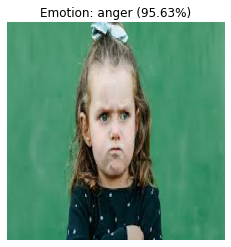

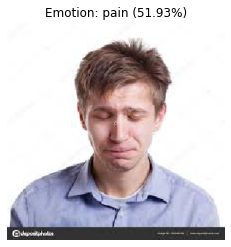

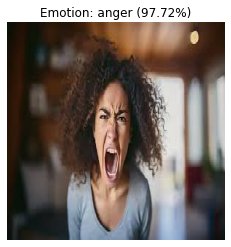

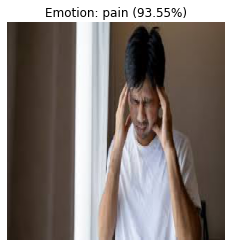

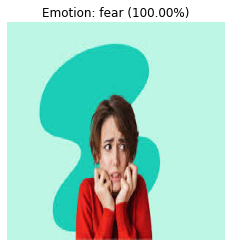

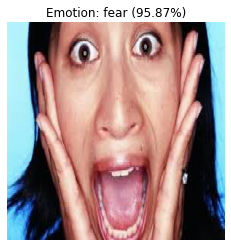

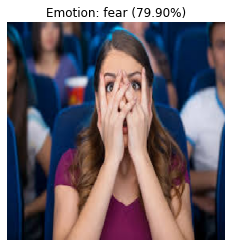

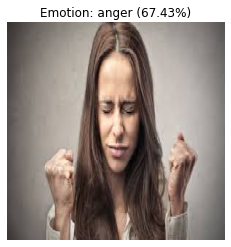

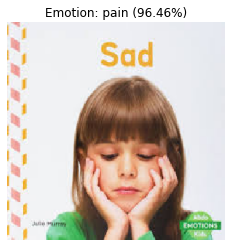

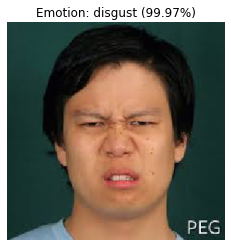

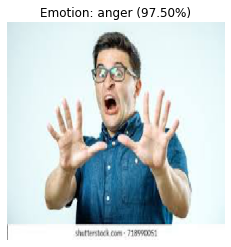

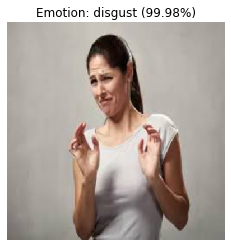

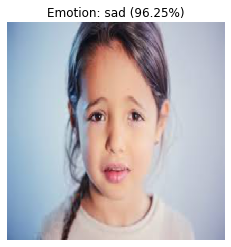

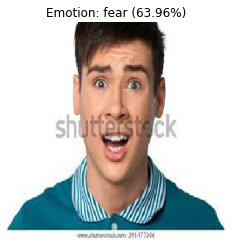

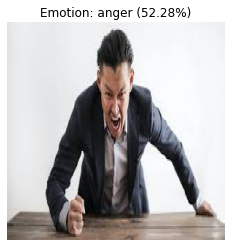

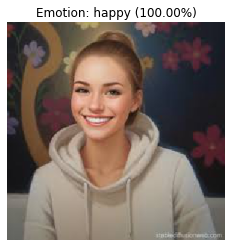

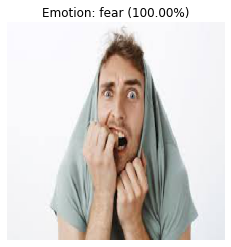

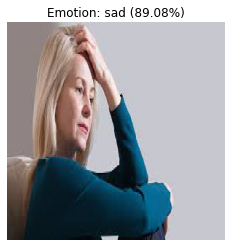

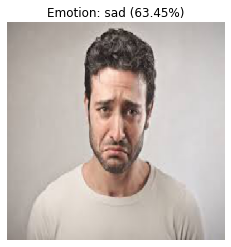

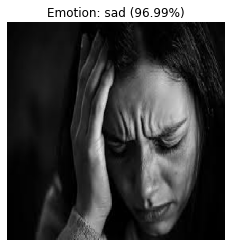

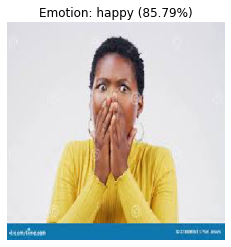

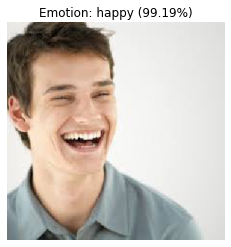

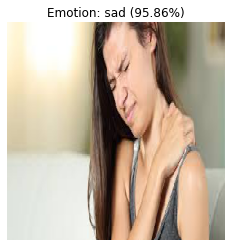

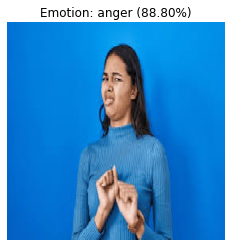

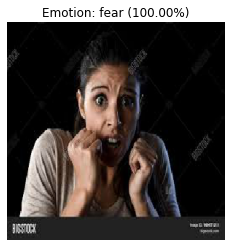

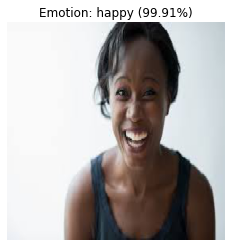

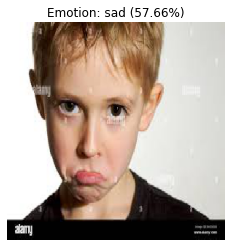

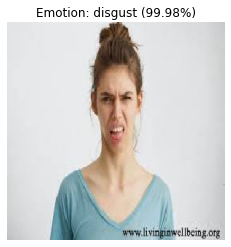

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall


# Load the trained model with emotion.
model = load_model('/home/nvinhhung/best_model_2.keras')

#Reload the parameters when training the model.
model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

# Path to the folder containing test images
test_image_folder = '/home/nvinhhung/nvidia/data/emotionTest'

emotion_labels = ['anger', 'disgust', 'fear', 'happy', 'pain', 'sad'] 

# Browse through the images in the folder and display the prediction results
for img_file in os.listdir(test_image_folder):
    img_path = os.path.join(test_image_folder, img_file)
    
    # Read and normalize the image
    img = load_img(img_path, target_size=(299, 299))  # Set target_size to (299, 299) for compatibility
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predicting emotions from images
    predictions = model.predict(img_array)
    predicted_label = emotion_labels[np.argmax(predictions)]
    confidence = np.max(predictions) * 100  # Độ tin cậy của dự đoán

    # Display the image and prediction results
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Emotion: {predicted_label} ({confidence:.2f}%)")
    plt.show()